In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Read the data from txt file
with open('../Data/email-Eu-core-department-labels.txt') as f:
    department_labels = f.readlines()
with open('../Data/email-Eu-core.txt') as f:
    core_data = f.readlines()

In [3]:
# strip and split the data
department_labels = [x.strip().split() for x in department_labels]
core_data = [x.strip().split() for x in core_data]

In [4]:
# how many unique departments are there?
unique_departments = set([x[1] for x in department_labels])
print('There are {} unique departments'.format(len(unique_departments)))

There are 42 unique departments


## Adjacency Matrix and List

In [5]:
# make graph treating each entry in core_data as an edge
num_nodes = len(set([x[0] for x in core_data] + [x[1] for x in core_data]))

adjacency_matrix = np.zeros((num_nodes, num_nodes))
for edge in core_data:
    adjacency_matrix[int(edge[0]), int(edge[1])] = 1

# create adjacency list from core_data
adjacency_list = [[] for i in range(num_nodes)]
for edge in core_data:
    adjacency_list[int(edge[0])].append(int(edge[1]))

#### 1. Number of Nodes

In [6]:
num_nodes = len(adjacency_list)
print('There are {} nodes in the graph'.format(num_nodes))

There are 1005 nodes in the graph


#### 2. Number of Edges

In [7]:
num_edges = sum([len(x) for x in adjacency_list])
print('There are {} edges in the graph'.format(num_edges))

There are 25571 edges in the graph


#### 3. Avg In-Degree

In [8]:
# indegree is the number of edges pointing to a node
ls_indegree = []
for i in range(num_nodes):
    ls_nodes_that_point_to_i = [x for x in adjacency_list if i in x]
    ls_indegree.append(len(ls_nodes_that_point_to_i))
print('The average indegree is {}'.format(np.mean(ls_indegree)))

The average indegree is 25.443781094527363


#### 4. Avg Out-Degree

In [9]:
ls_outdegree = [len(x) for x in adjacency_list]
print('The average outdegree is {}'.format(np.mean(ls_outdegree)))

The average outdegree is 25.443781094527363


#### 5. Node with Max In-Degree

In [10]:
node_with_max_indegree = np.argmax(ls_indegree)
max_indegree = ls_indegree[node_with_max_indegree]
print('The node with the maximum indegree is {} with indegree {}'.format(node_with_max_indegree, max_indegree))

The node with the maximum indegree is 160 with indegree 212


#### 6. Node with Max Out-Degree

In [11]:
node_with_max_outdegree = np.argmax(ls_outdegree)
max_outdegree = ls_outdegree[node_with_max_outdegree]
print('The node with the maximum outdegree is {} with outdegree {}'.format(node_with_max_outdegree, max_outdegree))

The node with the maximum outdegree is 160 with outdegree 334


#### 7. Density of the Network

In [12]:
density = num_edges / (num_nodes * (num_nodes - 1))
print('The density of the graph is {}'.format(density))

The density of the graph is 0.025342411448732432


#### Degree distribution of the network

Text(0, 0.5, 'Frequency')

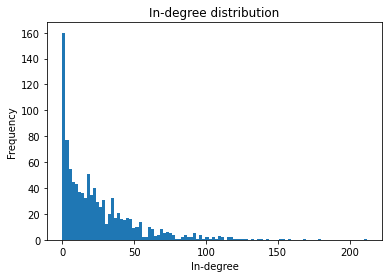

In [13]:
plt.hist(ls_indegree, bins=100)
plt.title('In-degree distribution')
plt.xlabel('In-degree')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

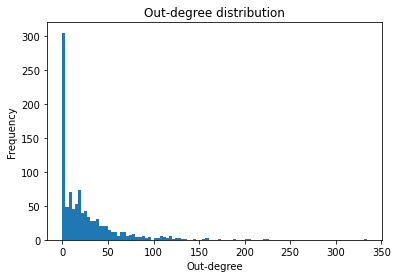

In [14]:
plt.hist(ls_outdegree, bins=100)
plt.title('Out-degree distribution')
plt.xlabel('Out-degree')
plt.ylabel('Frequency')

#### Local clustering coefficient of each node & clustering-coefficient distribution

In [15]:
local_clustering_coefficient = []
for node in range(num_nodes):
    node_degree = len(adjacency_list[node])
    if node_degree == 0 or node_degree == 1:
        local_clustering_coefficient.append(0)
    else:
        num_links_between_neighbors = 0
        neighbours = adjacency_list[node]
        for i in range(len(neighbours)):
            for j in range(i+1, len(neighbours)):
                if adjacency_matrix[neighbours[i], neighbours[j]] == 1:
                    num_links_between_neighbors += 1
        local_clustering_coefficient.append(num_links_between_neighbors / (node_degree * (node_degree - 1)))


In [16]:
lcc_vs_freq = {}
for lcc in local_clustering_coefficient:
    if lcc in lcc_vs_freq:
        lcc_vs_freq[lcc] += 1
    else:
        lcc_vs_freq[lcc] = 1

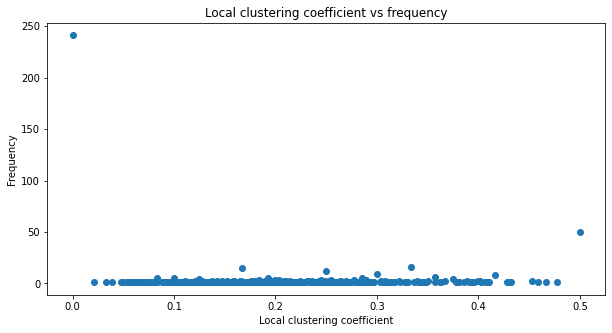

In [26]:
# plot the local clustering coefficient vs frequency
plt.scatter(lcc_vs_freq.keys(), lcc_vs_freq.values())
plt.title('Local clustering coefficient vs frequency')
plt.xlabel('Local clustering coefficient')
plt.ylabel('Frequency')
# Increase the size of the plot
plt.rcParams["figure.figsize"] = (10,5)